# Week04a

### Example01 - 데이터 시각화

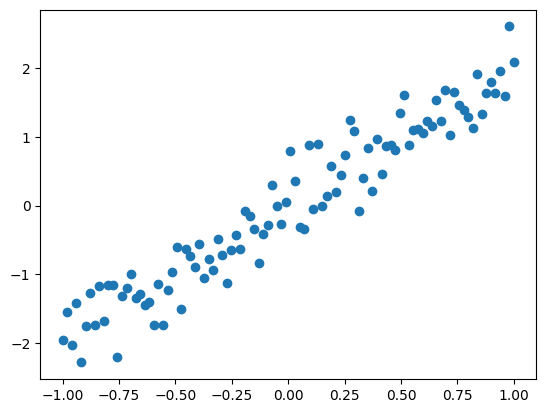

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 임의 생성
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape)*0.33

# Numpy에서 Tensor로 변환
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

# 시각화
plt.scatter(x_train, y_train)
plt.show()

### Example02 - 선형 회귀 코드

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: 1.1880
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1365
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0870
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0393
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.9937
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.9498
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.9077
Epoch 8/100
44/44 [===========

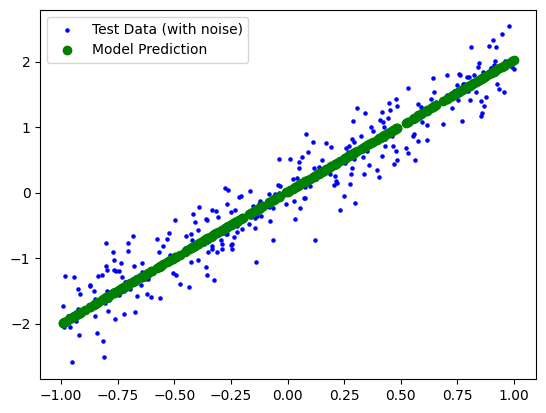

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# 입력 data (-1 ~ 1 까지 1000개의 data)
x_train = np.linspace(-1, 1, 1000)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

# Model 구축
model = models.Sequential([
    layers.Input(shape=(1,)), # 입력 1차원 변수
    layers.Dense(1) # 출력 뉴런 1개
])

# test30%, train70% 데이터 나눔
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# 최적화
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss="mse") # MSE (Mean Squared Error)
model.summary()
# 모델 학습, 예측
history = model.fit(x_train, y_train, epochs=100, batch_size=16) # epochs(100번 반복 학습)
y_pred = model.predict(x_test)
# 시각화
plt.scatter(x_test, y_test, color="blue", s=5, label="Test Data (with noise)")
plt.scatter(x_test, y_pred, color="green", linewidth=1, label="Model Prediction")
plt.legend()
plt.show()

### Example03 - 비선형 다항 회귀 코드

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
44/44 [==============================] - 1s 2ms/step - loss: 11.8825
Epoch 2/40
44/44 [==============================] - 0s 2ms/step - loss: 4.3302
Epoch 3/40
44/44 [===========

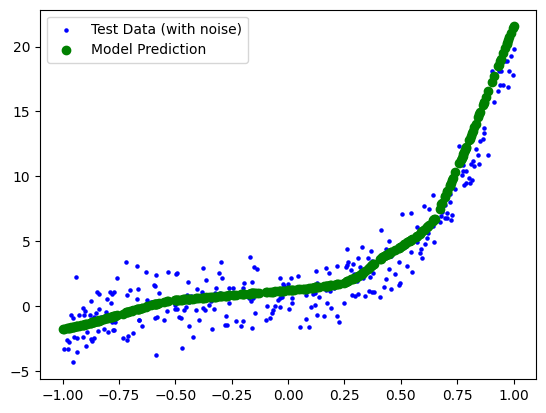

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

learning_rate = 0.0085 
training_epochs = 40
x_train = np.linspace(-1, 1, 1001) 
iterations = 0
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
y_train = 0

for i in range(num_coeffs):
    y_train += trY_coeffs[i] * np.power(x_train, i) 
y_train += np.random.randn(*x_train.shape) * 1.5

model = models. Sequential([
    layers.Input(shape=(1,)), # 입력 1차원 변수
    layers.Dense(32, activation="relu"), # 첫번째 은닉층으로 32개의 뉴런
    layers.Dense(16, activation="relu"), # 두번째 은닉층으로 16개의 뉴런
    layers.Dense(1) # 출력 뉴런 1개
])

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

#Compile the model
optimizer = SGD(learning_rate=learning_rate, momentum = 0.5) # 경사 하강법
model.compile(optimizer=optimizer, loss="mse")
model.summary()
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=16) # training_epochs 만큼 학습, 16개의 샘플
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color="blue", s=5, label="Test Data (with noise)")
plt.scatter(x_test, y_pred, color="green", linewidth=1, label="Model Prediction")
plt.legend()
plt.show()

### Example04

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                128       
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2380
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2364
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2354
Epoch 4/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2328
Epoch 6/1000
3/3 [==============================] - 0s 3m

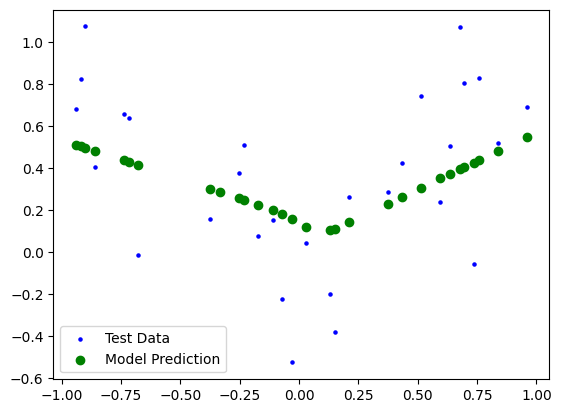

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

learning_rate = 0.001
training_epochs = 3000
reg_lambda = 0.001
num_coeffs = 9
x_dataset = np.linspace(-1, 1, 100)
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0

for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)

y_dataset += np.random.randn(*x_dataset.shape) * 0.3 # 노이즈
# plt.scatter(x_dataset, y_dataset)
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(reg_lambda)),
    layers.Dense(1)
])

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3)

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss="mse")
model.summary()
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=32)
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color="blue", s=5, label="Test Data")
plt.scatter(x_test, y_pred, color="green", linewidth=1, label="Model Prediction")
plt.legend()
plt.show()

### Example04 - 다중 출력 회기 코드

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 입력 데이터 X 3개의 샘플, 2개의 특성
x = np.array([1, 2], [3, 4], [5, 6])
# 출력 데이터 Y 3개의 샘플, 2개의 출력
y = np.array([3, 5], [7, 8], [11, 13])

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=5, input_shape=[2], activation="relu"), # 은닉층
    tf.keras.layers.Dense(units=2) # 출력층 
])

model.compile(optimizer=tf.keras.optimizers.Adam(0, 1), loss="mean_squared_error")
history = model.fit(x, y, epochs=100, verbose=0)

plt.scatter(y[:, 0], predictions[:, 0], color="blue", label="First Output")
plt.plot(y[:, 0], y[:, 0], "r--", label="Ideal Prediction for First Output")







TypeError: array() takes from 1 to 2 positional arguments but 3 were given